6 inputs: "station","bound","line","month_number","hour","year"
Scaling: standardscaled and get_dummies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../Data/ttc_subway_delay_2018_2019_for_machine_learning.csv')
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,7601,2018-02-13,6:57,Tuesday,BROADVIEW STATION,EUNT,2,4,W,BD,5285,Equipment - No Trouble Found,43.676944,-79.358333,Bloor Danforth,February,5-9AM,2,6,2018
1,3102,2019-06-12,11:54,Wednesday,COXWELL STATION,TUNIP,2,5,W,BD,5350,Operator Not In Position,43.684167,-79.323056,Bloor Danforth,June,9AM-12PM,6,11,2019
2,10917,2018-07-31,17:05,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018
3,10918,2018-07-31,17:33,Tuesday,COXWELL STATION,TUNOA,2,4,E,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018
4,10919,2018-07-31,17:40,Tuesday,COXWELL STATION,TUNOA,2,4,W,BD,0,No Operator Immediately Available,43.684167,-79.323056,Bloor Danforth,July,3-6PM,7,17,2018


In [3]:
df.columns

Index(['id', 'date', 'time', 'day', 'station', 'code', 'min_delay', 'min_gap',
       'bound', 'line', 'vehicle', 'code_info', 'latitude', 'longitude',
       'line_name', 'month', 'time_range', 'month_number', 'hour', 'year'],
      dtype='object')

In [4]:
df_selected = df[["station","bound","line","month_number","hour","year"]]
#df_selected = df[["station","bound","day","hour"]]
#df_selected = df[["station","bound","month_number","hour","year","day_number"]]
#df_selected = df[["station","month_number","hour"]]
#df_selected = df[["bound","line","month_number","hour","year"]]
df_selected.head()

,station,bound,line,month_number,hour,year
0,BROADVIEW STATION,W,BD,2,6,2018
1,COXWELL STATION,W,BD,6,11,2019
2,COXWELL STATION,E,BD,7,17,2018
3,COXWELL STATION,E,BD,7,17,2018
4,COXWELL STATION,W,BD,7,17,2018


In [5]:
# Assign the data to X and y

X_NoEncoded = df_selected
y = df["min_delay"].values.reshape(-1, 1)
print(X_NoEncoded.shape, y.shape)

(13517, 6) (13517, 1)


GET DUMMIES ALL

In [6]:
X = pd.get_dummies(X_NoEncoded)
X.head()

,month_number,hour,year,station_BATHURST STATION,station_BAY STATION,station_BAYVIEW STATION,station_BESSARION STATION,station_BROADVIEW STATION,station_CASTLE FRANK STATION,station_CHESTER STATION,...,station_YORK UNIVERSITY STATION,station_YORKDALE STATION,bound_E,bound_N,bound_S,bound_W,line_BD,line_SHP,line_SRT,line_YU
0,2,6,2018,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,6,11,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,7,17,2018,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,7,17,2018,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,7,17,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape)

(10137, 91) (10137, 1)


StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [10]:
#--> FOR SCALED!!

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.04605595377853389
Testing Score: 0.01614776934007922


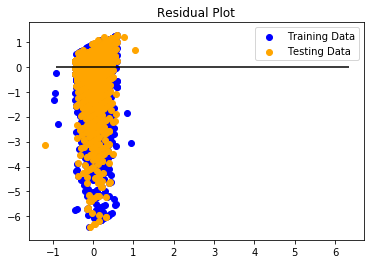

In [11]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION